# PyfA Assignment 3

**Learning topics:**
- Pandas multiindex
- Pandas data wrangling
- Creating and interpretting plots

**Datasets:** 
- cdc_birth_data.csv
- marathon_dataset.csv

**Please do not share this material on any platform or by any other means.**
    
### **Important Notes:** 

* Purpose of the assignment is to assess your knowledge and command of the Python programming language and your ability to resolve common errors. Grading is based on the code you are submitting, not the formatting of the results. 
* Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question. 
* Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions. 

---
# Pandas `MultiIndex`
## Q1A: Use the following data to create a Pandas Series object with `State` and `Year` as the index.


```python 
index = [('California',2000),('California',2010),
        ('New York', 2000),('New York',2010),
        ('Texas',2000),('Texas',2010)]
populations =[33871648,37253956,
             18976457,19378102,
             20851820,25145561]
```

In [1]:
import pandas as pd
import numpy as np 

index = [('California',2000),('California',2010),
        ('New York', 2000),('New York',2010),
        ('Texas',2000),('Texas',2010)]
populations =[33871648,37253956,
             18976457,19378102,
             20851820,25145561]

In [2]:
# create a multi-index
m_index = pd.MultiIndex.from_tuples(index)
m_index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [3]:
# use multi-index on populations
state_pop = pd.Series(populations, index = m_index)
state_pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Q1B:Choose all values from 2010. 

In [4]:
# use multi-index slicing to extract numbers from 2010
state_pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

## Q1C: Convert the series object created in 1A to a dataframe where index becomes `state` (name of the index is `state` as well).

In [11]:
# use to_frame to cnvert 
pd.Series.to_frame(state_pop, name = "Population")

Population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

----
# Pandas Data Wrangling
USA Centers for Disease Control and Prevention - US Birth Dataset
(source: http://www.cdc.gov/nchs/data_access/Vitalstatsonline.htm)

Data dictionary:
year, month, day, gender (F=Female or M= Male), births (number of births on the date)

## Question 2A: Read in the "cdc_birth_data.csv". Add a `decade` column (if year is 1969, the decade is 1960). Use a pivot table to show the total number of female and male births by decade. Interpret how male births compare to female births. 

In [37]:
import numpy as np
import pandas as pd

# read data 
df = pd.read_csv('cdc_birth_data.csv',delimiter=' *, *', engine='python')
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [38]:
# check for nulls
df.isnull().sum() #there are 480 NaNs in day

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [39]:
# fill NaNs with 0s 
df.fillna(0, inplace=True)
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,0.0,M,183219
15543,2008,11,0.0,F,158939
15544,2008,11,0.0,M,165468
15545,2008,12,0.0,F,173215


In [40]:
# convert day to integers
df['day'] = df['day'].astype(int)
df

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,0,M,183219
15543,2008,11,0,F,158939
15544,2008,11,0,M,165468
15545,2008,12,0,F,173215


In [41]:
# add decade column and update values
df['decade'] = df['year']
df.loc[df['year'] == 1969, 'decade'] = 1960
df.loc[df['year'].isin([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979]), 'decade'] = 1970
df.loc[df['year'].isin([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989]), 'decade'] = 1980
df.loc[df['year'].isin([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]), 'decade'] = 1990
df.loc[df['year'].isin([2000,2001,2002,2003,2004,2005,2006,2007,2008]), 'decade'] = 2000

In [42]:
#test decade column
df[df['year'] == 1972]

,year,month,day,gender,births,decade
2300,1972,1,1,F,3653,1970
2301,1972,1,1,M,4040,1970
2302,1972,1,2,F,3844,1970
2303,1972,1,2,M,3951,1970
2304,1972,1,3,F,4518,1970
...,...,...,...,...,...,...
3060,1972,12,30,M,4490,1970
3061,1972,12,31,F,3710,1970
3062,1972,12,31,M,4102,1970
3063,1972,12,99,F,20,1970


Use a pivot table to show the total number of female and male births by decade. Interpret how male births compare to female births.

In [43]:
gender_birth = df.groupby(['gender','decade'])['births'].sum()
gender_birth

gender  decade
F       1960       1753634
        1970      16263075
        1980      18310351
        1990      19479454
        2000      18229309
M       1960       1846572
        1970      17121550
        1980      19243452
        1990      20420553
        2000      19106428
Name: births, dtype: int64

There were more male births than female births for all decades from 1960 to 2000.

## Question 2B: use a `Pandas.DataFrame.plot()` to show the total number of births by gender (using 2A)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'Births by Gender'}, xlabel='gender', ylabel='Births'>

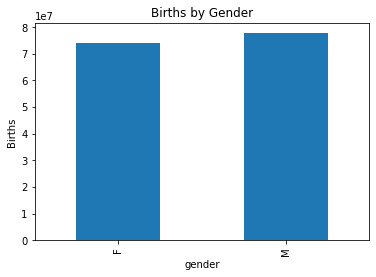

In [45]:
# plot graph by gender and total births
x = df.groupby('gender')['births'].sum()
plt.xlabel("Gender")
plt.ylabel("Births")
plt.title("Births by Gender")
x.plot.bar()

## Question 2C: Calculate the 25th, 50th and 75th percentile of births data. (Hint: use np.percentile)

In [46]:
# calculate quartiles 
quartile_25th = df['births'].quantile(0.25)
quartile_50th = df['births'].quantile(0.5)
quartile_75th = df['births'].quantile(0.75)

quartile_25th 
#quartile_50th
#quartile_75th

4358.0

## Question 2D: If sigma is defined as below, remove the records out side of 5sigma. Use the cleaned data in 2E and 2F.

```sigma = 0.74 * (quartile_75th - quartile_25th)```

`quartile_75th` and `quartile_25th` are calculated in 2c.

In [47]:
# calculate sigma
sigma = 0.74 * (quartile_75th - quartile_25th)
sigma

689.31

In [48]:
# calculate what needs to be removed
remove = 5*sigma
remove

3446.5499999999997

In [49]:
# identify upper and lower bounds to remove from mean
upper = df['births'].mean() + remove
lower = df['births'].mean() - remove

In [50]:
# create new df
filtered_df = df[(df['births'] >= lower) & (df['births'] < upper)]
filtered_df

,year,month,day,gender,births,decade
1323,1970,9,22,M,6480,1970
13379,1986,9,16,M,6323,1980
13385,1986,9,19,M,6379,1980
13393,1986,9,23,M,6352,1980
13399,1986,9,26,M,6370,1980
13591,1986,12,30,M,6337,1980
14105,1987,9,11,M,6471,1980
14323,1987,12,29,M,6322,1980
14709,1988,7,6,M,6418,1980
14711,1988,7,7,M,6527,1980


In [51]:
# review what we filtered
print('Filtered dataset: ',filtered_df.shape[0] / df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / df.shape[0])*100,2), '%')

Filtered dataset:  0.0019296327265710426
Remaining data:  0.19 %
Removed data:  99.81 %


In [52]:
# rename filtered_df to df for ease of coding
df = filtered_df
df

,year,month,day,gender,births,decade
1323,1970,9,22,M,6480,1970
13379,1986,9,16,M,6323,1980
13385,1986,9,19,M,6379,1980
13393,1986,9,23,M,6352,1980
13399,1986,9,26,M,6370,1980
13591,1986,12,30,M,6337,1980
14105,1987,9,11,M,6471,1980
14323,1987,12,29,M,6322,1980
14709,1988,7,6,M,6418,1980
14711,1988,7,7,M,6527,1980


## Question 2E: Create a graph that shows which day is the most popular dayof the week for giving birth in each decade.

To accomplish this goal, you can: Create a new column named `dayoftheweek`.(Monday==1) Plot mean of `birth` data by `dayoftheweek` for each `decade`. 

**By looking at the graph, what can you tell about the popularity of Sundays vs Tuesdays?.**

In [53]:
# check datatypes
df.dtypes

year       int64
month      int64
day        int32
gender    object
births     int64
decade     int64
dtype: object

In [54]:
# create df for date using year, month, date
df_date = pd.DataFrame({'year': df['year'],
                       'month': df["month"],
                       'day': df["day"]})
df['date'] = pd.to_datetime(df_date)

df.head()

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,month,day,gender,births,decade,date
1323,1970,9,22,M,6480,1970,1970-09-22
13379,1986,9,16,M,6323,1980,1986-09-16
13385,1986,9,19,M,6379,1980,1986-09-19
13393,1986,9,23,M,6352,1980,1986-09-23
13399,1986,9,26,M,6370,1980,1986-09-26


In [55]:
#calculate day of week
df['dayOfWeek'] = df['date'].dt.dayofweek +1
df.head()

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,month,day,gender,births,decade,date,dayOfWeek
1323,1970,9,22,M,6480,1970,1970-09-22,2
13379,1986,9,16,M,6323,1980,1986-09-16,2
13385,1986,9,19,M,6379,1980,1986-09-19,5
13393,1986,9,23,M,6352,1980,1986-09-23,2
13399,1986,9,26,M,6370,1980,1986-09-26,5


In [56]:
# create dayName with name of day
df.loc[(df.dayOfWeek == 1), 'dayName'] = "Monday"
df.loc[(df.dayOfWeek == 2), 'dayName'] = "Tuesday"
df.loc[(df.dayOfWeek == 3), 'dayName'] = "Wednesday"
df.loc[(df.dayOfWeek == 4), 'dayName'] = "Thursday"
df.loc[(df.dayOfWeek == 5), 'dayName'] = "Friday"
df.loc[(df.dayOfWeek == 6), 'dayName'] = "Saturday"
df.loc[(df.dayOfWeek == 7), 'dayName'] = "Sunday"
df.head()

C:\Users\meltra02\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\meltra02\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\meltra02\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,year,month,day,gender,births,decade,date,dayOfWeek,dayName
1323,1970,9,22,M,6480,1970,1970-09-22,2,Tuesday
13379,1986,9,16,M,6323,1980,1986-09-16,2,Tuesday
13385,1986,9,19,M,6379,1980,1986-09-19,5,Friday
13393,1986,9,23,M,6352,1980,1986-09-23,2,Tuesday
13399,1986,9,26,M,6370,1980,1986-09-26,5,Friday


In [57]:
birth_mean = df.groupby(['decade','dayName'])['births'].mean().astype(int)
birth_mean

decade  dayName  
1970    Tuesday      6480
1980    Friday       6413
        Monday       6344
        Thursday     6411
        Tuesday      6357
        Wednesday    6386
Name: births, dtype: int32

Create a graph that shows which day is the most popular dayof the week for giving birth in each decade.

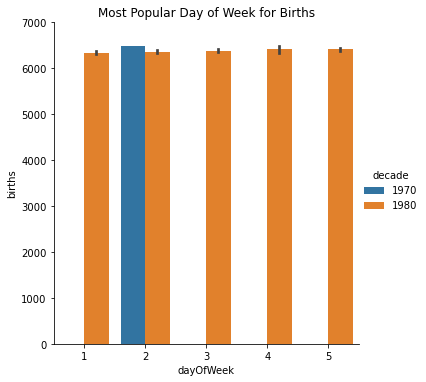

In [60]:
popular_birth_chart = sns.catplot(x='dayOfWeek',y='births',data = df, kind='bar',hue ='decade')
popular_birth_chart.set(title = 'Most Popular Day of Week for Births')
popular_birth_chart.set(ylim=(0, 7000))

## Question 2F: Plot the average births by the day of the year. 
You'll be plotting the average of births on each day Jan 1 through Dec 31st inclusive.

In [62]:
# look at average births
df.groupby('day').mean()['births'].astype(int) #convert from float to int

day
6     6418
7     6462
8     6368
9     6474
11    6471
12    6352
14    6402
15    6397
16    6374
19    6348
20    6398
21    6329
22    6476
23    6417
26    6370
28    6323
29    6333
30    6337
Name: births, dtype: int32

[(0.0, 8000.0)]

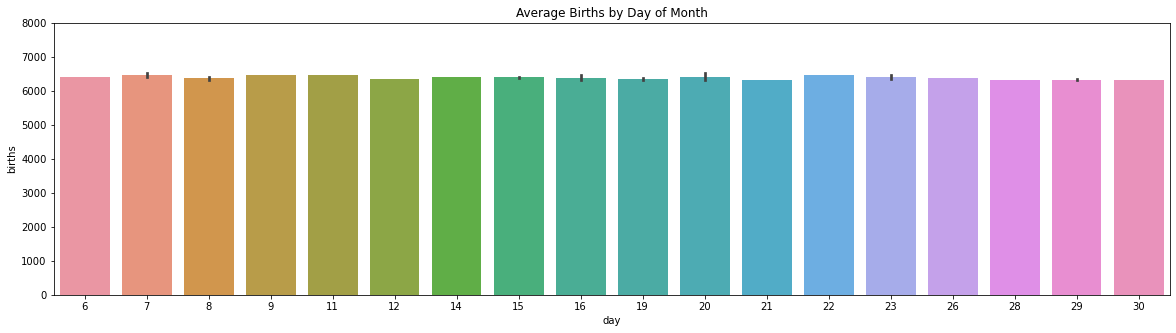

In [63]:
# plot the average
fig_dims = (20, 5)

fig, ax = plt.subplots(figsize=fig_dims)

avg_birth = sns.barplot(x = "day", y = "births",ax=ax, data=df)
avg_birth.set(title = 'Average Births by Day of Month')
avg_birth.set(ylim=(0, 8000))

---
# Plotting Data with `Seaborn` Library

## Question 3A: Read the marathon_dataset.csv and use `seaborn.joinplot()` to plot the relationship between the first-half marathon finishing time and the full-marathon finishing time. 

**Data dictionary**: each observation shows the `age`, `gender` of the runner. `split_sec` is the finishing time of the first-half marathon. `final_sec` is the full-marathon finishing time. 

In [64]:
# read in the data
df = pd.read_csv('marathon_dataset.csv',delimiter=';', engine='python')
df.head()

,age,gender,split_sec,final_sec
0,33,M,3938.0,7731.0
1,32,M,3986.0,7768.0
2,31,M,4009.0,7842.0
3,38,M,3976.0,8025.0
4,31,M,3992.0,8039.0


In [65]:
# look at data types
df.dtypes

age            int64
gender        object
split_sec    float64
final_sec    float64
dtype: object

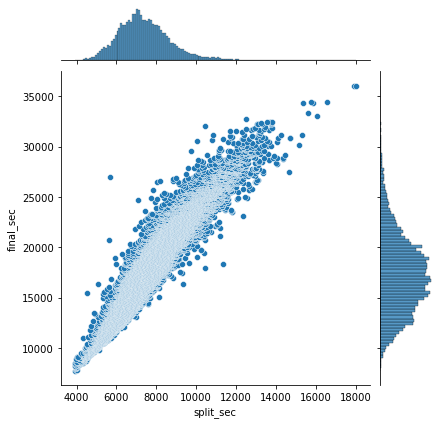

In [66]:
# create plot using jointplot
time_plot = sns.jointplot(x = "split_sec", y = "final_sec",data = df)
time_plot

## Question 3B: Create a distribution plot of runners' racing strategy
Let's define a new variable, to identify the runners' racing strategy: *negative-split (those who have a slower first half and faster second half),  *positive-split* (those who have a faster first half and slower second half).

    racing_str = 1 - (2 * split_sec) / final_sec

If racing strategy is less than zero, this indicates runner's strategy is negative-split.

In [67]:
# create racing_str variable 
racing_str = 1 - (2 * df["split_sec"]) / df["final_sec"]
racing_str

0       -0.018756
1       -0.026262
2       -0.022443
3        0.009097
4        0.006842
           ...   
37245    0.077057
37246    0.038421
37247    0.084544
37248    0.007436
37249    0.002495
Length: 37250, dtype: float64

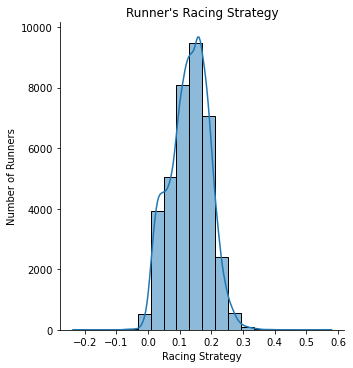

In [68]:
# plot racing_str against number of runners
racing_str = pd.Series(racing_str, name = "Racing Strategy")
race_chart = sns.displot(racing_str, bins = 20, kde = True)

race_chart.set(title = "Runner's Racing Strategy")
race_chart.set(ylabel = "Number of Runners")

In [69]:
# add the racing_str to the dataset
racing_str = pd.Series(racing_str, name = "Racing Strategy")
df['racing_str'] = racing_str
df

,age,gender,split_sec,final_sec,racing_str
0,33,M,3938.0,7731.0,-0.018756
1,32,M,3986.0,7768.0,-0.026262
2,31,M,4009.0,7842.0,-0.022443
3,38,M,3976.0,8025.0,0.009097
4,31,M,3992.0,8039.0,0.006842
...,...,...,...,...,...
37245,18,M,15864.0,34377.0,0.077057
37246,36,M,16543.0,34408.0,0.038421
37247,51,M,15755.0,34420.0,0.084544
37248,55,W,17886.0,36040.0,0.007436


## Question 3C: Are there any correlation between any of the variables? Explain.

You can use `sns.PairGrid` function or similar. 

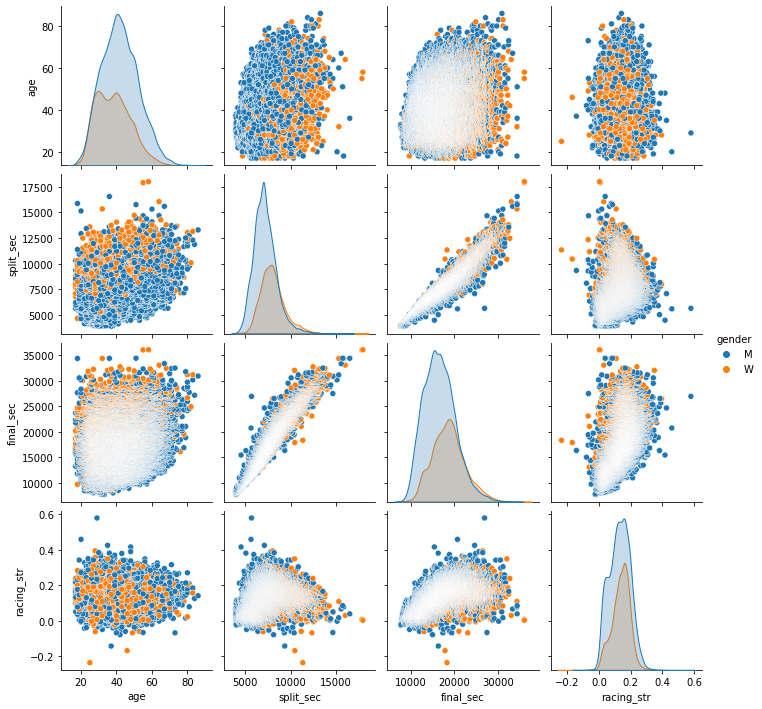

In [70]:
# plot the correlation
sns.pairplot(df, hue="gender")

There is a high correlation between split_sec and final_sec which makes sense because if you finish the first half-marthon with a higher (therefore slower) time, you will also finish the full-marthon at a higher time. Men tend to have a faster split_sec time than women with a clear distinction of men on the left side (lower split_sec time) of the correlation plot. Both men and women are clustering around 0.2 seconds in their racing strategy time. 

## Question 3D: What is the distribution of race strategy by gender? What is your interpretation of the graph?

In [1]:
# plot the graph of racing str by gender
sns.set_palette("Paired")
race_by_gender = sns.displot(data=df, x= df["racing_str"], hue= df["gender"], kind="hist")
race_by_gender.set(title = "Racing Strategy by Gender")

NameError: name 'sns' is not defined

In [72]:
# review the statistics 
df.groupby('gender').describe()['racing_str']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
M,24665.0,0.127995,0.064915,-0.143102,0.080003,0.130179,0.175240,0.579326
W,12585.0,0.136556,0.054830,-0.237000,0.102361,0.141791,0.174742,0.393999


Because the mean of both distributions are > 0, it looks like a  majority of both men and women have positive-split racing strategies where their first half is faster and their second half is slower. The mean racing strategy time for women is 0.1366 compared to men at 0.1280. Men have a longer right tail (positive split) - with the max at 0.5793 compared to women at 0.3940. Women have a longer left tail (negative split) with the min at -0.237 compared to men at -0.1431. 

## Question 3E : Compare the distributions of men and women (3D) as a function of age, use a violin plot.

Create a column named `age_group` to group decade of age, e.g. if a person is 36 years old, `age_group` = 30. Then create a violin plot to show by age group by gender, the distribution of race strategy. 

In [73]:
# statistics for age 
df['age'].describe()

count    37250.000000
mean        40.697369
std         10.220043
min         17.000000
25%         33.000000
50%         40.000000
75%         48.000000
max         86.000000
Name: age, dtype: float64

In [74]:
# create age groups
df.loc[(df.age < 99), 'age_group'] = 90
df.loc[(df.age < 89), 'age_group'] = 80
df.loc[(df.age < 79), 'age_group'] = 70
df.loc[(df.age < 69), 'age_group'] = 60
df.loc[(df.age < 59), 'age_group'] = 50
df.loc[(df.age < 49), 'age_group'] = 40
df.loc[(df.age < 39), 'age_group'] = 30
df.loc[(df.age < 29), 'age_group'] = 20
df.loc[(df.age < 19), 'age_group'] = 10
df.loc[(df.age < 9), 'age_group'] = 0

# convert age_group to int
df['age_group'] = df['age_group'].astype(int)

In [75]:
df

,age,gender,split_sec,final_sec,racing_str,age_group
0,33,M,3938.0,7731.0,-0.018756,30
1,32,M,3986.0,7768.0,-0.026262,30
2,31,M,4009.0,7842.0,-0.022443,30
3,38,M,3976.0,8025.0,0.009097,30
4,31,M,3992.0,8039.0,0.006842,30
...,...,...,...,...,...,...
37245,18,M,15864.0,34377.0,0.077057,10
37246,36,M,16543.0,34408.0,0.038421,30
37247,51,M,15755.0,34420.0,0.084544,50
37248,55,W,17886.0,36040.0,0.007436,50


<AxesSubplot:xlabel='age_group', ylabel='racing_str'>

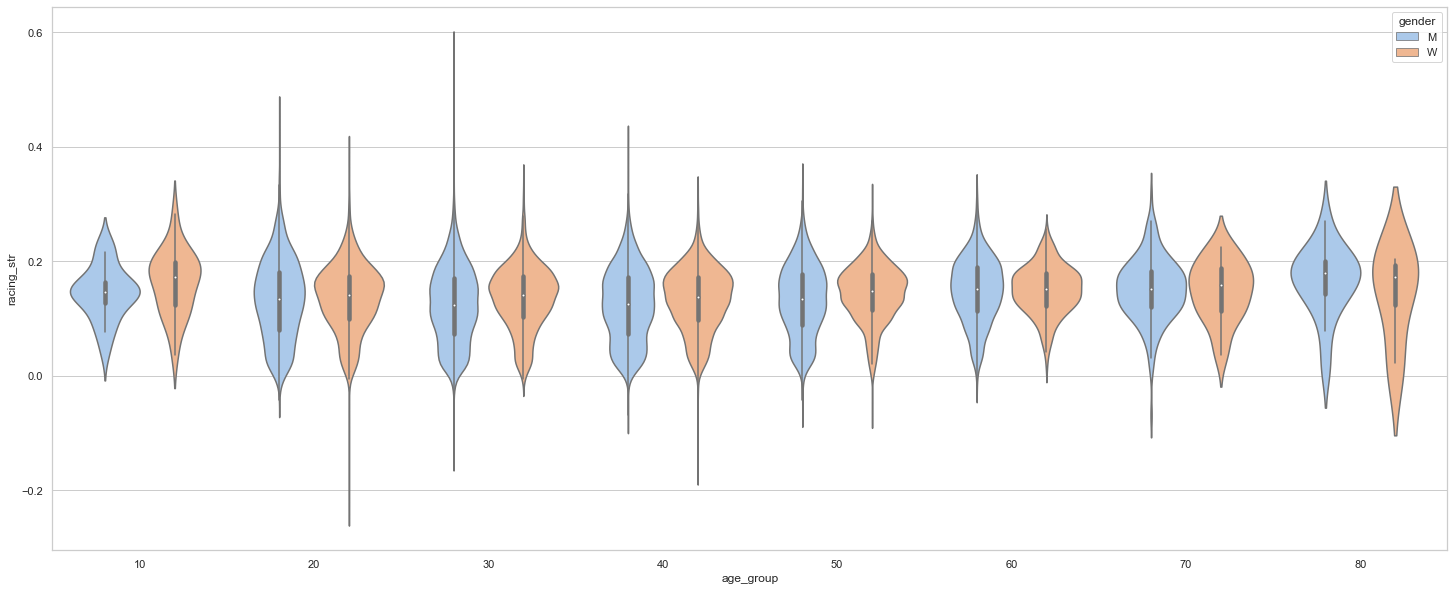

In [76]:
# plot the violin graph
fig_dims = (30, 10)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
f, ax = plt.subplots(figsize=(25, 10))
sns.violinplot(x="age_group", y="racing_str", hue="gender", data=df)

**Assignment 3 complete.**